# Projet S2
## Visualisation et exploration
Pour réussir ce projet, vous devrez faire une analyse descriptive des principaux facteurs qui influencent le fait d'obtenir un deuxième rendez-vous.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
speed_dating = pd.read_csv("data/Speed Dating Data.csv", encoding="ISO-8859-1")

In [ ]:
speed_dating.shape

In [ ]:
speed_dating.info()

In [ ]:
speed_dating.head()

In [ ]:
np.sort(speed_dating.columns[speed_dating.isnull().sum() / speed_dating.shape[0] >= 0.4])

In [ ]:
speed_dating.columns[speed_dating.columns.str.startswith("int")]

In [2]:
self_attributes = [
    "gender", # Female 0, Male 1
    "age",    
    "race",    
    "samerace",
    "imprace",
    "imprelig",
    "field",
    "sports",
    "tvsports",
    "exercise",
    "dining",
    "museums",
    "art",
    "hiking",
    "gaming",
    "clubbing",
    "reading",
    "tv",
    "theater",
    "movies",
    "concerts",
    "music",
    "shopping",
    "yoga"]

self_importance_in_partner = [
    # importance in a partner
    'amb1_1', 
    'attr1_1', 
    'fun1_1', 
    'intel1_1', 
    'shar1_1', 
    'sinc1_1'
]

self_ratings_1 = [
    # self ratings
    'amb3_1', 
    'attr3_1', 
    'fun3_1', 
    'intel3_1',
    'sinc3_1'
]

self_ratings_s = [
    'amb3_s', 
    'attr3_s', 
    'fun3_s', 
    'intel3_s',
    'sinc3_s'
]

self_partner_rating = [
    "attr",   
    "sinc",
    "intel",
    "fun",
    "amb",
    "shar",
    "int_corr",
    "exphappy",
    "expnum",
    "match_es",
    "like",
    "prob",
    "met",
    "dec"
]

partner = [
    "age_o",
    "race_o",
    # preferences
    "pf_o_att", # attractiveness 
    "pf_o_sin", # sincerity
    "pf_o_int", # intelligence
    "pf_o_fun", # funny
    "pf_o_amb", # ambitious
    "pf_o_sha", # shared interests   
]
partner_ratings = [
    # ratings
    "attr_o",   
    "sinc_o",
    "intel_o",
    "fun_o",
    "amb_o",
    "shar_o",
    "dec_o"    
]

target = ["match"]

features = self_attributes + self_importance_in_partner + self_partner_rating + self_ratings_1 \
+ partner + partner_ratings + target

In [5]:
df = speed_dating[features]

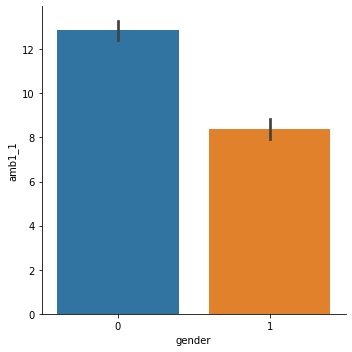

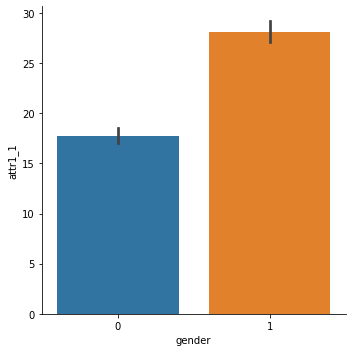

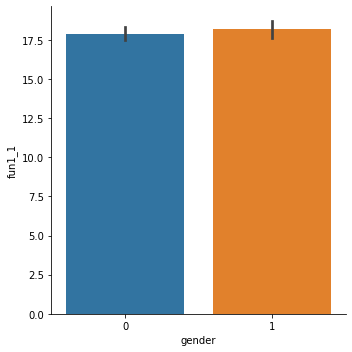

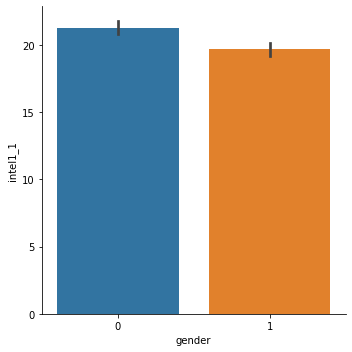

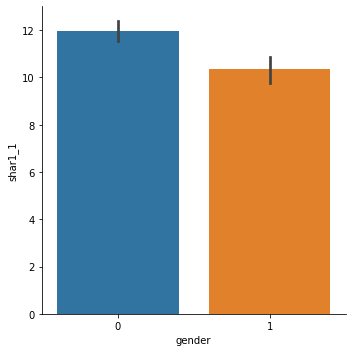

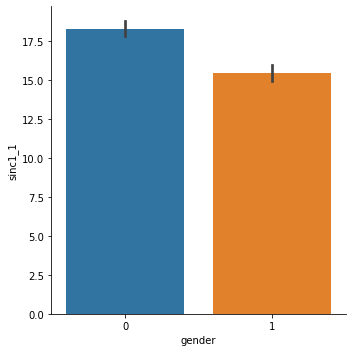

In [14]:
for i in self_importance_in_partner:
    sns.catplot(data = df.query("match == 1"), x = "gender", y = i, kind = "bar");

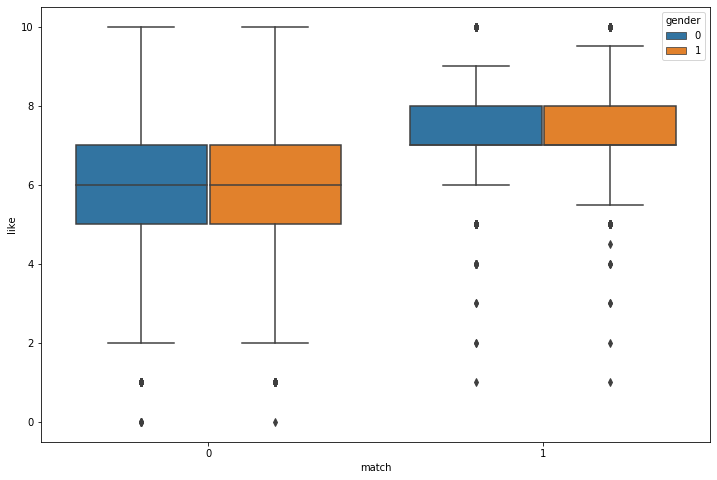

In [85]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = df, x = "match", y = "like", hue = "gender");

In [71]:
# création des données croisées match/genre/like
data1 = np.array(df.query("match == 0 & gender == 0")[["like"]].dropna())
data2 = np.array(df.query("match == 0 & gender == 1")[["like"]].dropna())
data3 = np.array(df.query("match == 1 & gender == 0")[["like"]].dropna())
data4 = np.array(df.query("match == 1 & gender == 1")[["like"]].dropna())

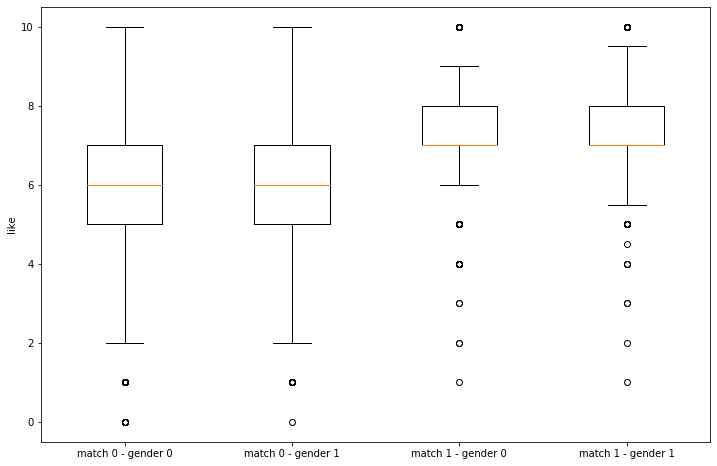

In [74]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.boxplot([data1, data2, data3, data4])
ax.set_xticklabels(["match 0 - gender 0", "match 0 - gender 1", "match 1 - gender 0", "match 1 - gender 1"])
ax.set_ylabel("like")

plt.show()

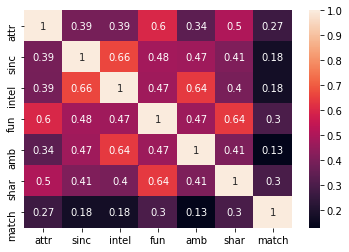

In [157]:
# quels sont les critères les plus importants pour une décision positive chez les femmes
pref = self_partner_rating[:6]
data = df.query("gender == 0")[pref + ["match"]]

corr = data.corr()

sns.heatmap(corr, annot=True);

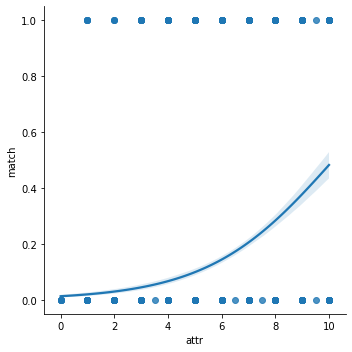

In [159]:
# l'attractivité important chez les femmes
sns.lmplot(data=data, x = pref[0], y = "match", logistic=True);

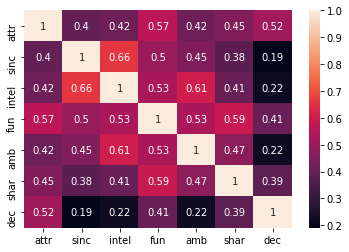

In [151]:
# quels sont les critères les plus importants pour une décision positive chez les hommes
data = df.query("gender == 1")[pref + ["dec"]]
corr = data.corr()
sns.heatmap(corr, annot=True);

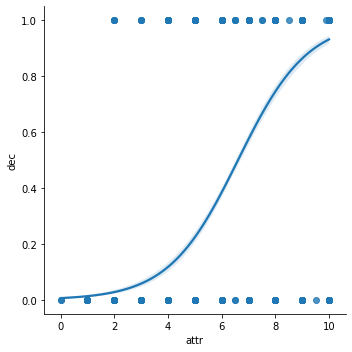

In [152]:
# l'attractivité important chez les hommes
sns.lmplot(data=data, x = pref[0], y = "dec", logistic=True);

In [67]:
# moyenne des notes données par les femmes
moyenne_notes_femme = df.query("gender == 0").groupby("match")[self_partner_rating[:6]].mean()
moyenne_notes_femme

,attr,sinc,intel,fun,amb,shar
match,,,,,,
0,5.676289,6.952939,7.318860,5.999849,6.844665,5.104390
1,7.118459,7.820700,8.075073,7.644217,7.485271,6.854167


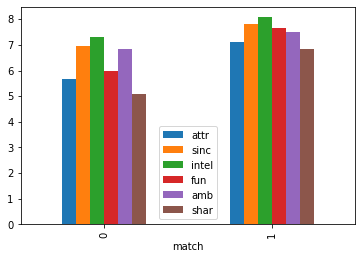

In [57]:
moyenne_notes_femme.plot(kind="bar");

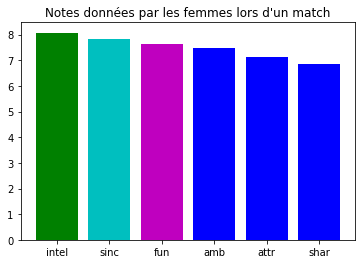

In [69]:
# moyenne des préférences chez les femmes lors d'un match

moyenne_notes_femme_match = moyenne_notes_femme.loc[1,:].sort_values(ascending=False)

fig, ax = plt.subplots()
color = ["g", "c", "m", "b", "b", "b"]
ax.bar(x = moyenne_notes_femme_match.index, height = moyenne_notes_femme_match.values, color = color)
ax.set_title("Notes données par les femmes lors d'un match")

plt.show()

In [22]:
moyenne_notes_femme.columns

Index(['attr', 'sinc', 'intel', 'fun', 'amb', 'shar'], dtype='object')

In [62]:
# moyenne des notes données par les hommes
moyenne_notes_homme = df.query("gender == 1").groupby("match")[self_partner_rating[:6]].mean()
moyenne_notes_homme

,attr,sinc,intel,fun,amb,shar
match,,,,,,
0,6.245417,7.139310,7.181047,6.309268,6.483684,5.309260
1,7.520319,7.798246,7.825292,7.552786,7.183409,6.654874


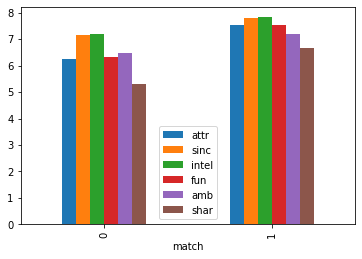

In [60]:
moyenne_notes_homme.plot(kind="bar");

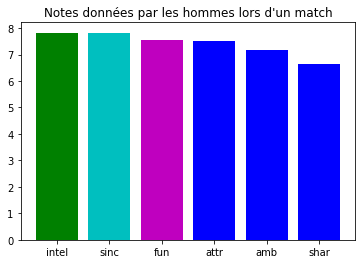

In [66]:
# moyenne des préférences chez les hommes lors d'un match


moyenne_notes_homme_match = moyenne_notes_homme.loc[1,:].sort_values(ascending=False)

fig, ax = plt.subplots()
color = ["g", "c", "m", "b", "b", "b"]
ax.bar(x = moyenne_notes_homme_match.index, height = moyenne_notes_homme_match.values, color= color)
ax.set_title("Notes données par les hommes lors d'un match")
plt.show()

In [ ]:
# est-ce que les notes de match correspondent aux préférences ?
